<a href="https://colab.research.google.com/github/AbeRodz/Cyberlabs-MNIST-Challenge/blob/main/Cyberlabs_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook is for the Cyberlabs internship test

***Note:*** *Recomended to use google collab, for easy usage.*


In [1]:
import torch
import torch.nn
import torchvision
import torch.optim
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np


In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()



In [3]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

### Checking for cuda devices

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda
Tesla K80
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


###Downloading an transformating the dataset using pytorch.


In [5]:
img_to_tensor = transforms.ToTensor()

In [6]:
dataset = MNIST('dataset', train = True, download= True,transform=img_to_tensor )
dataset_test = MNIST('dataset', train = False, download= True,transform=img_to_tensor)
train = list(dataset)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


###Filtering the datasets of interest '0' and '5' for the training dataset

***Note:*** *Filtering the specifics digits was quite challenging but this discussion helped https://discuss.pytorch.org/t/how-to-use-one-class-of-number-in-mnist/26276/19*

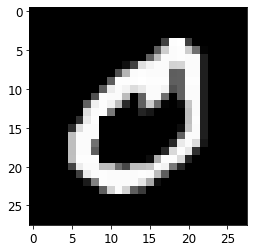

In [7]:
idx = (dataset.targets==0) | (dataset.targets==5) 
dataset.targets = dataset.targets[idx]
dataset.data = dataset.data[idx]
dataset
img = dataset[3][0][0]

plt.imshow(img, cmap='gray')

### Filtering the datasets of interest '0' and '5' for the testing dataset

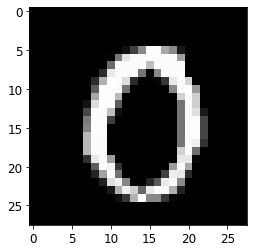

In [8]:
idx_t = (dataset_test.targets==0) | (dataset_test.targets==5) 
dataset_test.targets = dataset_test.targets[idx_t]
dataset_test.data = dataset_test.data[idx_t]
dataset_test
img = dataset_test[3][0][0]

plt.imshow(img, cmap='gray')

###Organizing the datasets of interest in their respective groups for both training and testing datasets

In [9]:
zeros_images_tensor = []
fives_images_tensor = []
for i, (image, label) in enumerate(dataset):
  if label == 0:
    zeros_images_tensor.append(image)
  elif label == 5:
    fives_images_tensor.append(image)


zeros_images_tensor = torch.stack(zeros_images_tensor).float()
fives_images_tensor = torch.stack(fives_images_tensor).float()

 

In [10]:
zeros_test_images_tensor = []
fives_test_images_tensor = []
for i, (image, label) in enumerate(dataset_test):
  if label == 0:
    zeros_test_images_tensor.append(image)
  elif label == 5:
    fives_test_images_tensor.append(image)


zeros_test_images_tensor = torch.stack(zeros_test_images_tensor).float()
fives_test_images_tensor = torch.stack(fives_test_images_tensor).float()

###Checking shapes

In [11]:
zeros_images_tensor.shape,fives_images_tensor.shape

(torch.Size([5923, 1, 28, 28]), torch.Size([5421, 1, 28, 28]))

In [12]:
zeros_test_images_tensor.shape , fives_test_images_tensor.shape

(torch.Size([980, 1, 28, 28]), torch.Size([892, 1, 28, 28]))

###Displaying images, and checking the integrity of the datasets

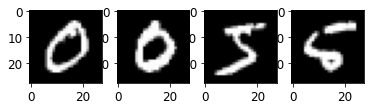

In [13]:
img_zero = zeros_images_tensor[0][0]
img_five = fives_images_tensor[0][0]
img_test_zero = zeros_test_images_tensor[0][0]
img_test_five = fives_test_images_tensor[0][0]
plt.subplot(141, label = 'zero')
plt.imshow(img_zero,  cmap='gray')

plt.subplot(142, label = 'test_zero')
plt.imshow(img_test_zero,  cmap='gray')

plt.subplot(143, label = 'five')
plt.imshow(img_five,  cmap='gray')
plt.subplot(144, label = 'test_five')
plt.imshow(img_test_five,  cmap='gray')

###Squeezing datasets, in order to get reduce the dimension to a 3th dimensional tensor


In [14]:
#squeezed train tensors
fives_squeezed_tensor = torch.squeeze(fives_images_tensor)
zeros_squeezed_tensor = torch.squeeze(zeros_images_tensor)

#squeezed test tensors
fives_test_images_tensor = torch.squeeze(fives_test_images_tensor)
zeros_test_images_tensor = torch.squeeze(zeros_test_images_tensor)

###Checking shapes and displaying and image

In [15]:
fives_squeezed_tensor.shape, zeros_squeezed_tensor.shape

(torch.Size([5421, 28, 28]), torch.Size([5923, 28, 28]))

In [16]:
zeros_test_images_tensor.shape , fives_test_images_tensor.shape

(torch.Size([980, 28, 28]), torch.Size([892, 28, 28]))

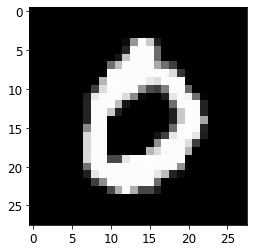

In [17]:
plt.imshow(zeros_test_images_tensor[0],  cmap='gray')

###Concatenating tensors in a training tensor and labeling 

In [18]:
train_x = torch.cat([zeros_squeezed_tensor, fives_squeezed_tensor]).view(-1, 28*28)

In [19]:
train_y = tensor([1]*len(zeros_squeezed_tensor) + [0]*len(fives_squeezed_tensor)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([11344, 784]), torch.Size([11344, 1]))

###Complete training dataset on a list format

In [20]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y


(torch.Size([784]), tensor([1]))

###Complete testing dataset on a list format

In [21]:
valid_x = torch.cat([zeros_test_images_tensor, fives_test_images_tensor]).view(-1, 28*28)
valid_y = tensor([1]*len(zeros_test_images_tensor) + [0]*len(fives_test_images_tensor)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))
x,y = valid_dset[1000]
x.shape,y
valid_y.shape , valid_x.shape

(torch.Size([1872, 1]), torch.Size([1872, 784]))

In [22]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [23]:
valid_dl = DataLoader(valid_dset, batch_size=256)

##Testing with the fast.ai method

In [24]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [25]:
weights = init_params((28*28,1))
bias = init_params(1)

In [26]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[-0.9199],
        [ 9.3014],
        [-1.8903],
        ...,
        [ 8.7505],
        [ 5.1091],
        [10.0949]], grad_fn=<AddBackward0>)

In [27]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.3411495089530945

In [28]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [29]:
preds = linear1(batch)
preds

tensor([[-0.9199],
        [ 9.3014],
        [-1.8903],
        [ 2.8119]], grad_fn=<AddBackward0>)

In [30]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [31]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.4102, grad_fn=<MeanBackward0>)

In [32]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0156), tensor([-0.0928]))

In [33]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [34]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0312), tensor([-0.1857]))

In [35]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0469), tensor([-0.2785]))

In [36]:
weights.grad.zero_()
bias.grad.zero_();

In [37]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [38]:
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [ True],
        [False],
        [ True]])

In [39]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [40]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.5000)

In [41]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [42]:
validate_epoch(linear1)

0.3032

In [43]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.4858

In [44]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.5023 0.5347 0.6006 0.7144 0.8091 0.8735 0.9141 0.9316 0.9414 0.9501 0.956 0.9594 0.9618 0.9652 0.9682 0.9721 0.9735 0.9745 0.9765 0.977 

##Model

In [45]:
valid_dl = DataLoader(valid_dset, batch_size=256)
dl = DataLoader(dset, batch_size=256)


###Final Dataloader


In [46]:
dls = DataLoaders(dl, valid_dl)
dls

###Accuracy function

In [47]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

### Simple neural net

In [48]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

###Simple linear model

In [49]:
linear_model = nn.Linear(28*28,1)

###Loss function

In [50]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

###Learn function

In [51]:
learn_linear = Learner(dls, linear_model, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [52]:
learn_simple = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

###Epochs and accuracy

In [53]:
learn_simple.fit(40, 0.1), learn_linear.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.376195,0.497408,0.476496,00:00
1,0.223870,0.455818,0.483440,00:00
2,0.137808,0.319779,0.679487,00:00
3,0.088448,0.206275,0.827457,00:00
4,0.062016,0.141892,0.896368,00:00
5,0.047541,0.105144,0.925214,00:00
6,0.039370,0.082333,0.941239,00:00
7,0.034543,0.067164,0.955128,00:00
8,0.031486,0.056574,0.961004,00:00
9,0.029385,0.048902,0.965278,00:00


epoch,train_loss,valid_loss,batch_accuracy,time
0,0.272027,0.494991,0.476496,00:00
1,0.186382,0.408960,0.526709,00:00
2,0.131551,0.278592,0.745726,00:00
3,0.099527,0.190209,0.863782,00:00
4,0.081002,0.139076,0.916667,00:00
5,0.069815,0.108509,0.940171,00:00
6,0.062632,0.089001,0.951389,00:00
7,0.057676,0.075794,0.961538,00:00
8,0.054014,0.066403,0.967415,00:00
9,0.051151,0.059450,0.968483,00:00


(None, None)

Accuracy

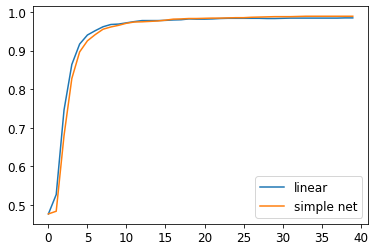

In [54]:
plt.subplot()
plt.plot(L(learn_linear.recorder.values).itemgot(2), label='linear'), 
plt.plot(L(learn_simple.recorder.values).itemgot(2), label='simple net');
plt.legend()